Hello! We are going to use a chunk of Sloan Digital Sky Survey's data here. Our aim is to build some machine learning model to classify galaxies/stars/quasars based on their spectral properties. After that we will also consider differnt metrics to assess those models' performance.

First thing first. Let's import some mandatory modules and packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import seaborn as sns
style.use(style='seaborn-deep')
from tabulate import tabulate
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

Accessing the dataset..............

In [2]:
sdss_df = pd.read_csv('star_classification.csv')

Let's check some basic info about the dataset.

In [3]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

So, there are 100,000 entries or rows and 18 columns in total.

In [4]:
print("The shape of the dataset: {}".format(sdss_df.shape))

The shape of the dataset: (100000, 18)


In [5]:
classes = sdss_df['class'].unique()
print(classes)

['GALAXY' 'QSO' 'STAR']


In [6]:
sdss_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,GALAXY,0.634794,5812,56354,171
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,GALAXY,0.779136,10445,58158,427
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,GALAXY,0.644195,4576,55592,299
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,GALAXY,0.932346,9149,58039,775
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.890000e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,GALAXY,0.404895,7626,56934,866
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,GALAXY,0.143366,2764,54535,74
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,GALAXY,0.455040,6751,56368,470


Let's check if there is any null value.

In [7]:
sdss_df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


All okay! No null value. Amazing!


In [8]:
sdss_df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

So, in our dataset there are 59445 galaxies, 21594 star, and 18961 QSOs. Now we can plot the Histogramof the classes. Here it is......

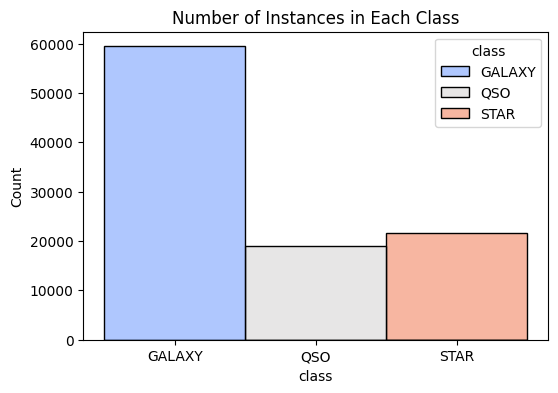

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data=sdss_df, x='class', hue='class', alpha=.7, palette='coolwarm')
plt.title('Number of Instances in Each Class')
plt.show()

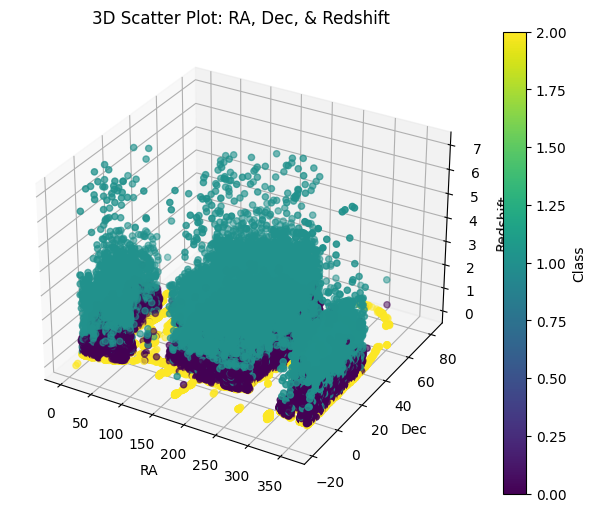

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sdss_df['class_rep'] = le.fit_transform(sdss_df['class'])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(sdss_df['alpha'], sdss_df['delta'], sdss_df['redshift'], c=sdss_df['class_rep'], cmap='viridis')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('Redshift')
ax.set_title('3D Scatter Plot: RA, Dec, & Redshift')

# Adding color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Class')

plt.show()


In [11]:
sdss_all_var=sdss_df.drop(['class_rep','class'], axis=1)

Now, we will check the features' correlations.

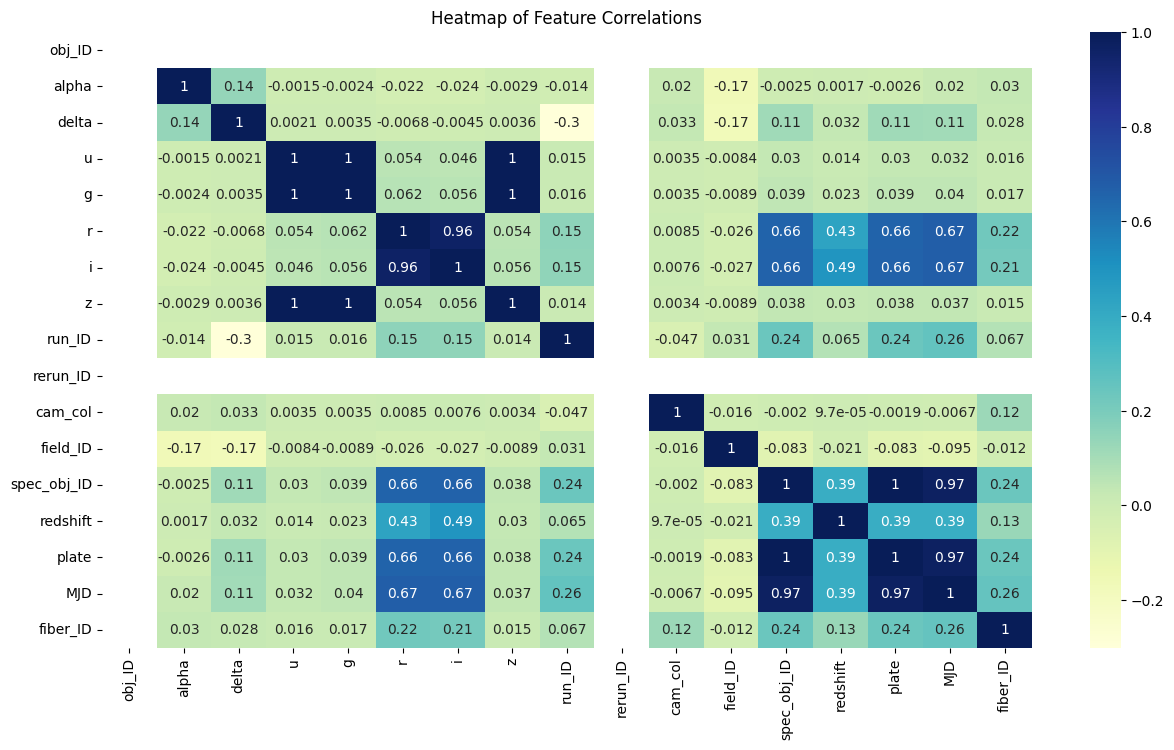

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(sdss_all_var.corr(), annot=True, cmap="YlGnBu")
plt.title('Heatmap of Feature Correlations')
# Define the path to save the plot as a PNG file
save_path = r'C:\Users\DELL\Downloads\ml_paper\heatmap.png'

# Save the plot as a PNG file
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
plt.show()

At this point, we exclude columns that solely represent distinct identification numbers. Additionally, we remove MJD since it serves as a time indicator, and cam_col, which is unrelated to class distinctions. From our domain knowledge we know that alpha and delta have also should not have any effect on the classification. 

In [15]:
sdss_imp=sdss_df.drop(['alpha', 'delta','obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','plate','MJD','fiber_ID', 'class_rep'], axis=1)
imp_columns = [ 'u', 'g', 'r', 'i', 'z', 'redshift']

In [16]:
sdss_imp

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


Let's visulaize the new column reduced dataset. 

In [17]:
def plot_boxplots(data_frame, analysis_columns, target_column):
    """
    This function generates boxplots for analyzing the distribution of data.

    Params:
    `data_frame`: DataFrame containing the dataset.
    `analysis_columns`: List of columns to analyze.
    `target_column`: Name of the target column.

    Returns:
    None
    """
    # Create a figure with appropriate size
    plt.figure(figsize=(15, 30))

    # Calculate the number of columns for subplots
    num_columns = len(analysis_columns)

    # Loop through the analysis columns
    for i, column in enumerate(analysis_columns):
        # Create a subplot for each feature
        plt.subplot(int('{}2{}'.format(num_columns, i+1)))

        # Generate a boxplot for the current feature
        sns.boxplot(x=target_column, y=column, data=data_frame, width=0.5, flierprops={'marker': 'x'})

        # Set the title for the boxplot
        plt.title(label='Boxplot of {}'.format(column), fontsize=10)

        # Remove x and y labels to avoid clutter
        plt.xlabel(xlabel=None)
        plt.ylabel(ylabel=None)

    # Display the boxplots
    plt.show()

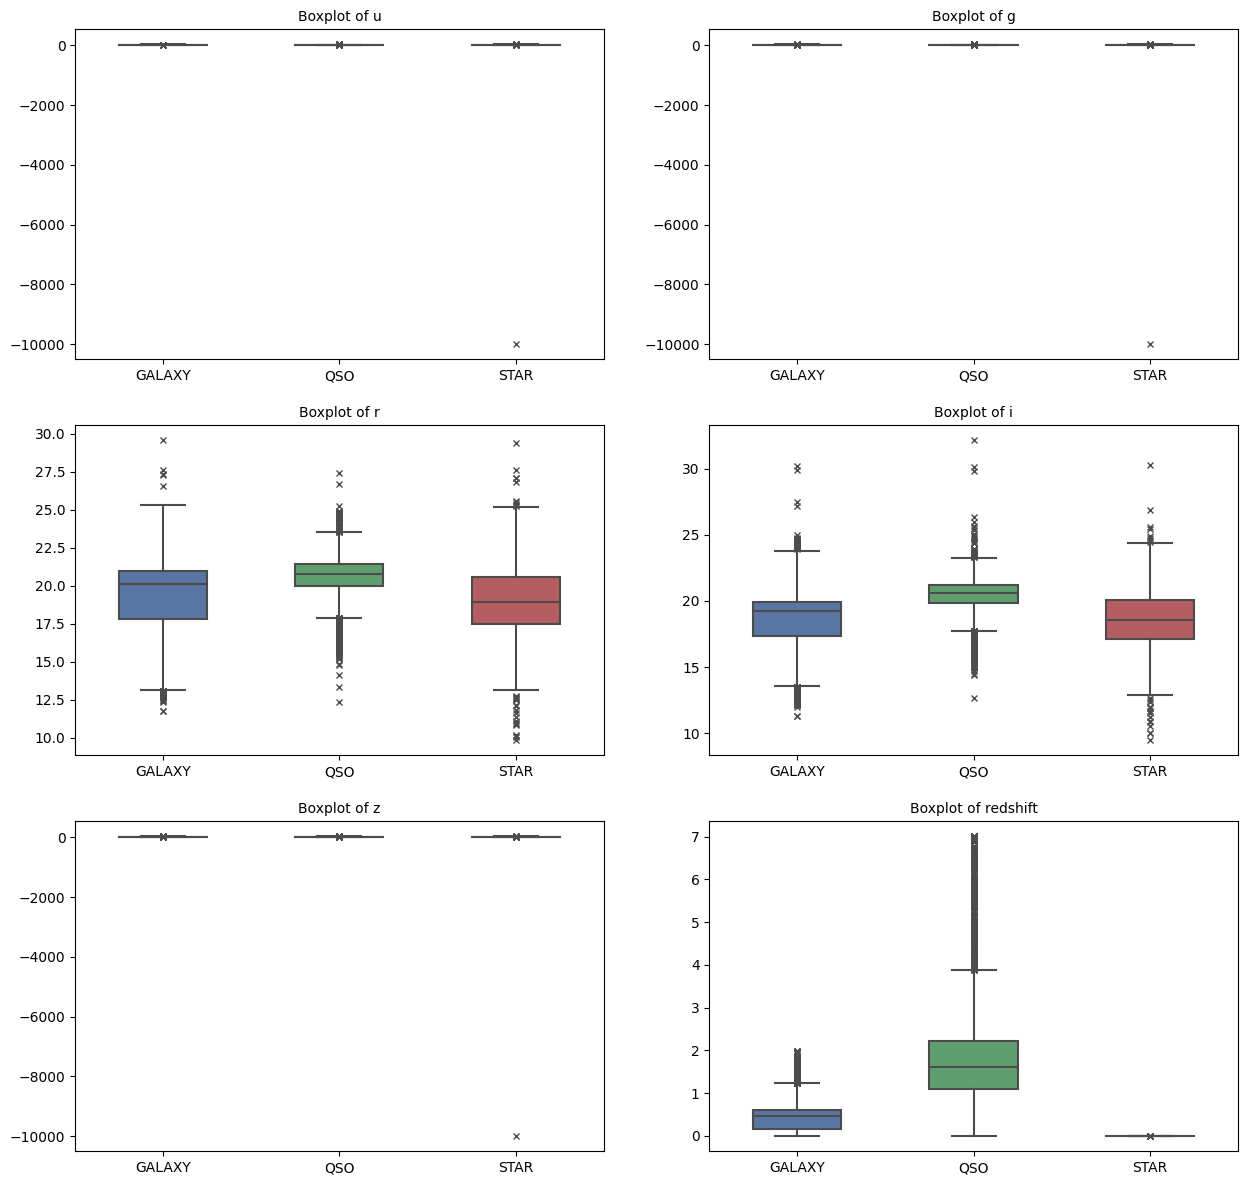

In [18]:
plot_boxplots(data_frame=sdss_imp, analysis_columns=imp_columns, target_column='class')